# 事前準備

In [30]:
import os
import json

import numpy as np
import pandas as pd


In [31]:
# 自作モジュールの読み込み
from modules.file_format.HDF5 import HDF5Reader, HDF5Writer


In [32]:
"""pathの設定"""
import sys
repository_root = None
for sys_path in sys.path:
    if sys_path.endswith('LAMBDA-Melting'):
        repository_root = sys_path
if repository_root is None:
    raise ValueError('repository_root is not set')

"""plot用の設定"""
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'     #数式用のフォントejavuserif" or "cm"
plt.rcParams['xtick.direction'] = 'in'      #x軸の目盛線 #内in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'      #y軸の目盛線 #内in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0     #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0     #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 14               #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.8        #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 6)
# Arialフォントを設定
plt.rcParams.update({
    "font.family": "Arial",           # フォントをArialに設定
    "mathtext.fontset": "custom",     # カスタムフォントを指定
    "mathtext.rm": "Arial",           # 数式の通常テキスト部分
    "mathtext.it": "Arial",    # 数式のイタリック部分
    "mathtext.bf": "Arial"       # 数式の太字部分
})


# 使用するRunのリストを作成

In [33]:
# hdfまでのroot
path_to_run_setting = os.path.join(repository_root, 'settings', 'run_selector.json')
with open(path_to_run_setting) as json_file:
    selected_run_setting = json.load(json_file)

hdf_folder = os.path.join(
    selected_run_setting['save_root_path'],
    'processed_hdf',
)
hdf_folder

'/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf'

In [34]:
files = sorted(os.listdir(hdf_folder))
files

['.DS_Store',
 'OIbDia08_1st_down_processed.hdf',
 'OIbDia08_1st_up_processed.hdf',
 'OIbDia08_2nd_down_processed.hdf',
 'OIbDia08_2nd_up_processed.hdf',
 'OIbDia08_3rd_down_processed.hdf',
 'OIbDia08_3rd_up_processed.hdf',
 'OIbDia08_4th_down_processed.hdf',
 'OIbDia08_4th_up_processed.hdf',
 'OIbDia08_5th_down_processed.hdf',
 'OIbDia08_5th_up_processed.hdf',
 'OIbDia08_6th_down_processed.hdf',
 'OIbDia08_6th_up_processed.hdf',
 'OIbDia08_7th_down_processed.hdf',
 'OIbDia08_7th_up_processed.hdf']

In [35]:
# リストを作成
melted_list = [
    'OIbDia08_2nd_down',
    'OIbDia08_2nd_up',
]

In [36]:
# hdf化
melted_hdf = []

for file in files:
    for melted in melted_list:
        if (melted in file) and (not file.startswith('.')):
            melted_hdf.append(HDF5Reader(os.path.join(hdf_folder, file)))

HDF5ファイルが見つかりました: /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_2nd_down_processed.hdf
HDF5ファイルが見つかりました: /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_2nd_up_processed.hdf


# 参照用データ

In [38]:
df = pd.read_csv('/Users/ishizawaosamu/Downloads/occelli_急いで作った.csv', header=None, names=['P', 'V'])

In [39]:
def calculate_unit_cell_volume(molar_volume_cm3, z):
    """
    ダイヤモンドのモル体積から単位格子の体積を計算する関数。

    Parameters:
    molar_volume_cm3 (float): モル体積 [cm^3/mol]
    z (int): 単位格子中の原子数 (ダイヤモンドの場合は 8)

    Returns:
    float: 単位格子の体積 [Å^3]
    """
    # アボガドロ数
    avogadro_number = 6.022e23  # [1/mol]

    # モル体積を Å^3/mol に変換
    molar_volume_a3 = molar_volume_cm3 * 1e24  # [Å^3/mol]

    # 単位格子の体積を計算
    unit_cell_volume = molar_volume_a3 * z / avogadro_number  # [Å^3]

    return unit_cell_volume

# ダイヤモンドのモル体積（[cm^3/mol]）
molar_volume_diamond = 3.42  # ダイヤモンドのモル体積（例）

# 単位格子中の原子数（ダイヤモンドは面心立方構造でZ=8）
z_diamond = 8

# 計算
unit_cell_volume_diamond = calculate_unit_cell_volume(molar_volume_diamond, z_diamond)

print(f"ダイヤモンドの単位格子体積: {unit_cell_volume_diamond:.2f} Å^3")


ダイヤモンドの単位格子体積: 45.43 Å^3


In [40]:
occeli_V = calculate_unit_cell_volume(df['V'].values, z_diamond)


# plot

「processed/value/P」で検索します。
	-> entry/processed/value/P を返しました。
「processed/error/P」で検索します。
	-> entry/processed/error/P を返しました。
「value/fitted_V/dia111」で検索します。
	-> entry/measured/value/fitted_V/dia111 を返しました。
「error/fitted_V_max/dia111」で検索します。
	-> entry/measured/error/fitted_V_max/dia111 を返しました。
「error/fitted_V_min/dia111」で検索します。
	-> entry/measured/error/fitted_V_min/dia111 を返しました。
「processed/value/P」で検索します。
	-> entry/processed/value/P を返しました。
「processed/error/P」で検索します。
	-> entry/processed/error/P を返しました。
「value/fitted_V/dia111」で検索します。
	-> entry/measured/value/fitted_V/dia111 を返しました。
「error/fitted_V_max/dia111」で検索します。
	-> entry/measured/error/fitted_V_max/dia111 を返しました。
「error/fitted_V_min/dia111」で検索します。
	-> entry/measured/error/fitted_V_min/dia111 を返しました。


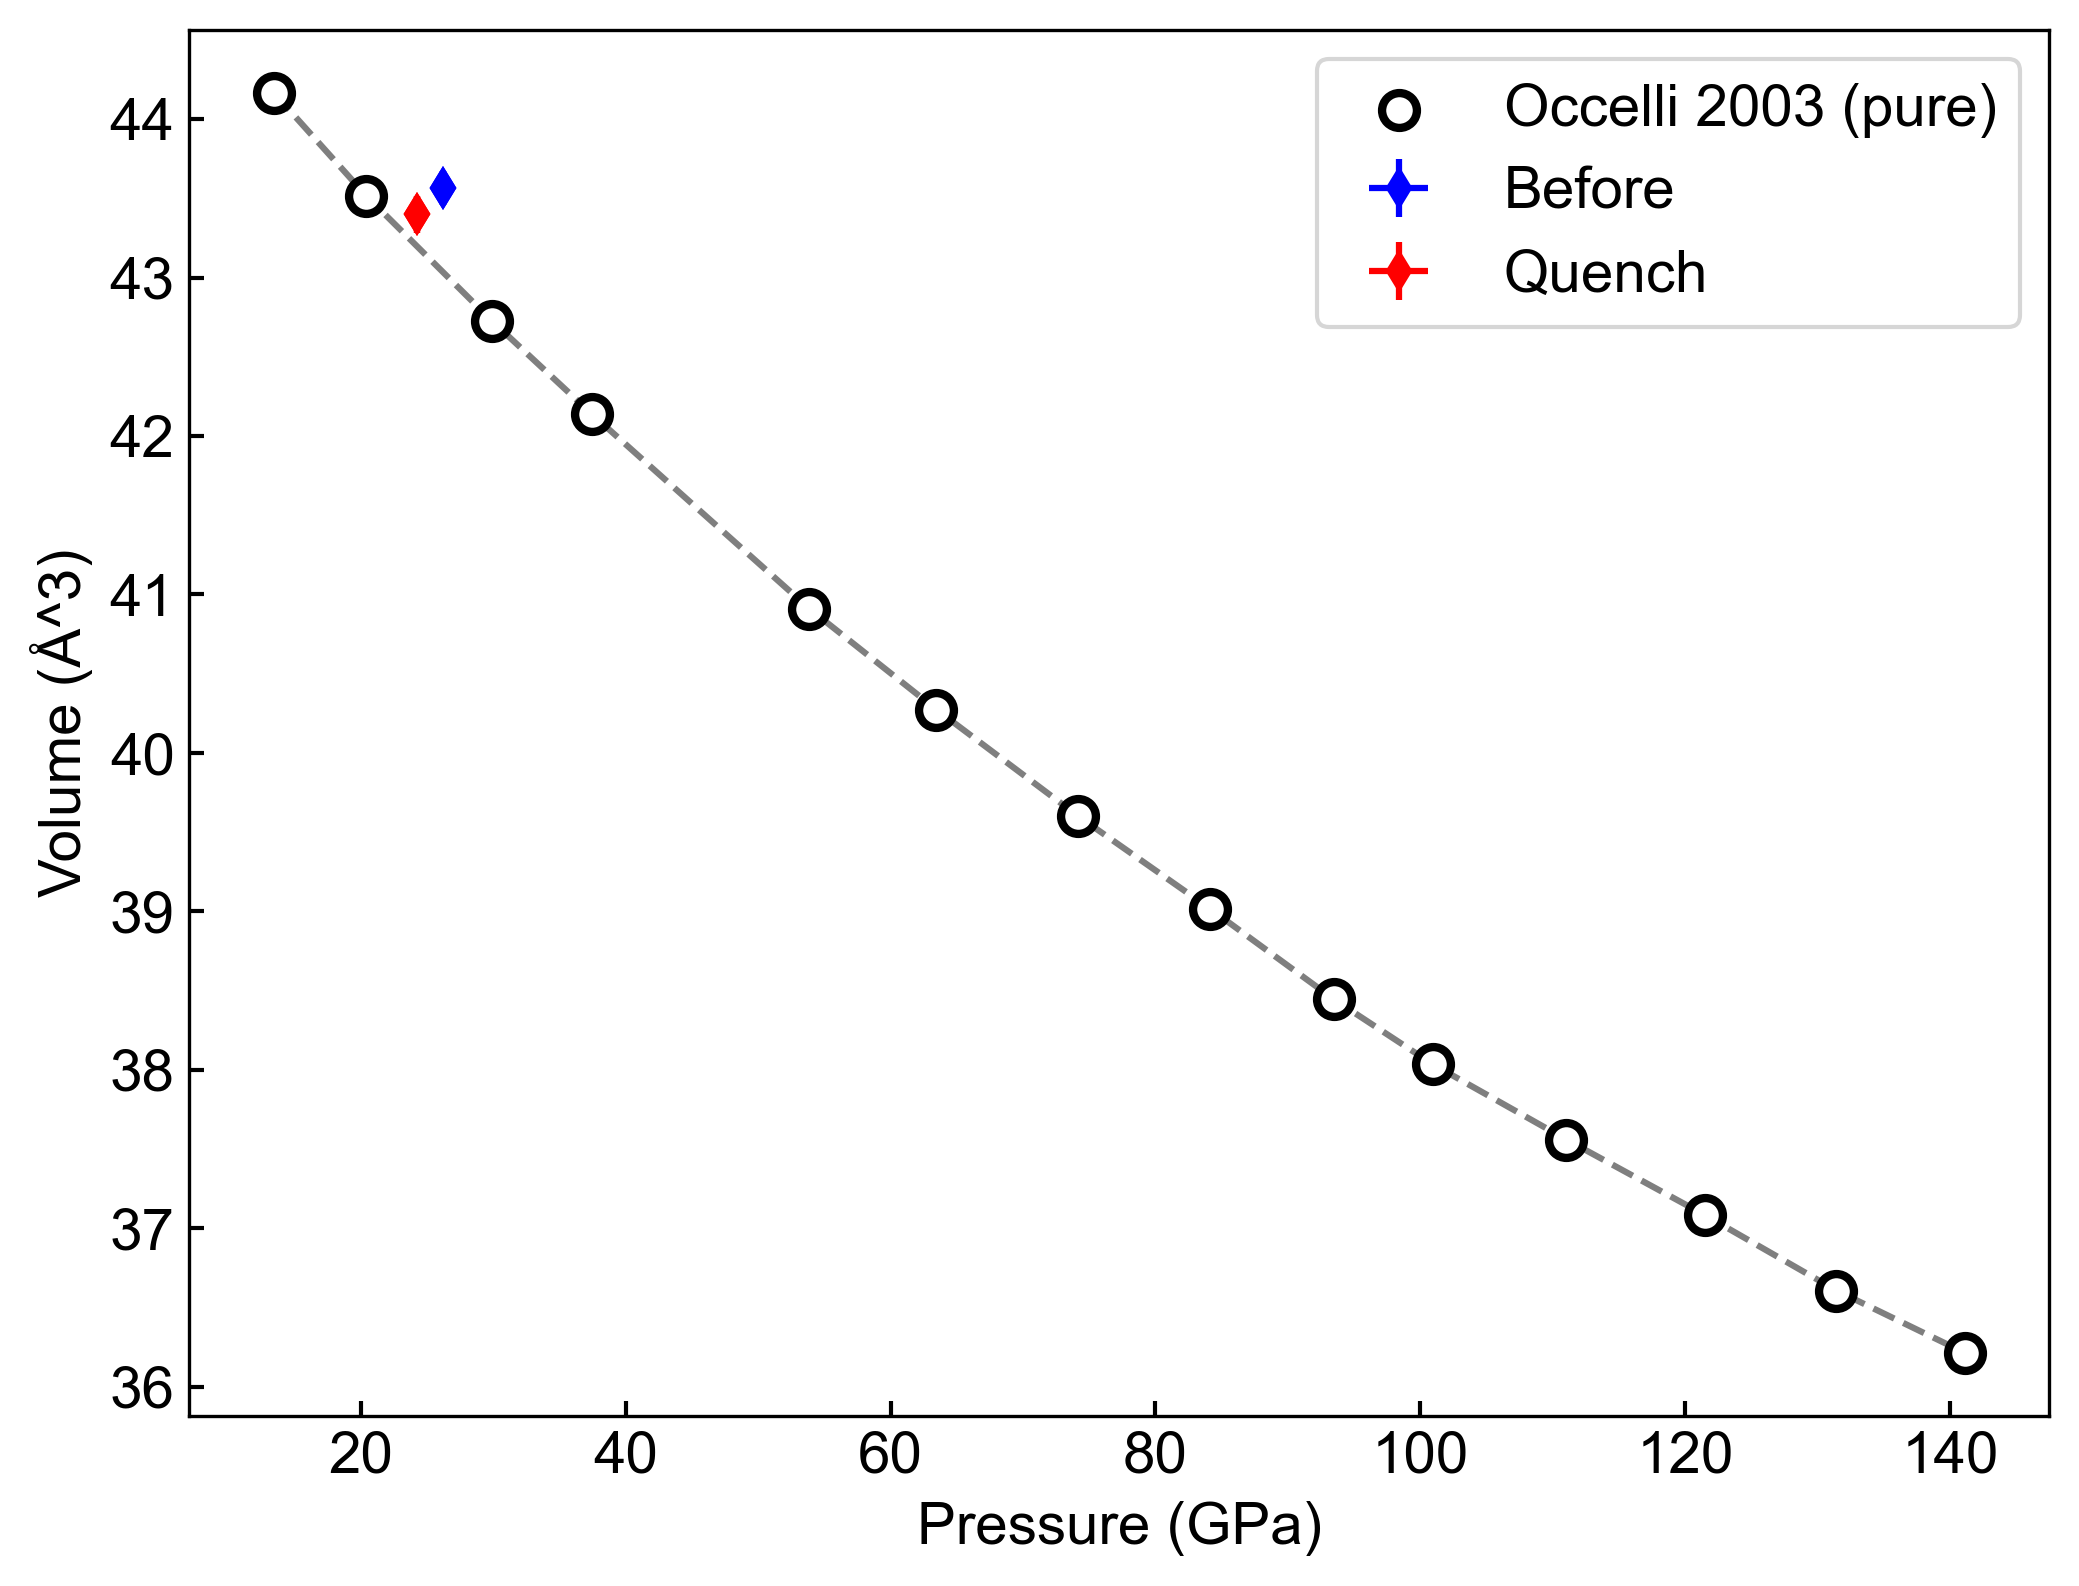

In [44]:
fig, ax = plt.subplots()
for i, hdf in enumerate(melted_hdf):
    # 圧力とエラーの取得
    P = hdf.find_by(query='processed/value/P')  # 圧力値
    P_error = hdf.find_by(query='processed/error/P')  # 圧力のエラー

    # 体積とエラーの取得
    V_BDD = hdf.find_by(query='value/fitted_V/dia111')  # 体積値
    V_BDD_error = {
        'max': hdf.find_by(query='error/fitted_V_max/dia111'),  # 最大エラー
        'min': hdf.find_by(query='error/fitted_V_min/dia111')   # 最小エラー
    }

    # プロット用のインデックス設定
    before_idx = 5  # "before" のインデックス
    quench_idx = -5  # "quench" のインデックス

    # yerr の計算（上下方向の差分）
    before_yerr = [
        [V_BDD[before_idx] - V_BDD_error['min'][before_idx]],  # 下方向
        [V_BDD_error['max'][before_idx] - V_BDD[before_idx]]   # 上方向
    ]

    quench_yerr = [
        [V_BDD[quench_idx] - V_BDD_error['min'][quench_idx]],  # 下方向
        [V_BDD_error['max'][quench_idx] - V_BDD[quench_idx]]   # 上方向
    ]

    # 圧縮曲線プロット: Before
    ax.errorbar(
        x=[P[before_idx]],  # x の形状を 1次元配列にする
        y=[V_BDD[before_idx]],  # y の形状を 1次元配列にする
        xerr=[[P_error[before_idx]], [P_error[before_idx]]],  # 上下方向同じ値なら 2次元配列
        yerr=before_yerr,  # (2, n) 配列形式
        color='blue',
        fmt='d',
        label='Before' if i == 0 else None,
    )

    # 圧縮曲線プロット: Quench
    ax.errorbar(
        x=[P[quench_idx]],  # x の形状を 1次元配列にする
        y=[V_BDD[quench_idx]],  # y の形状を 1次元配列にする
        xerr=[[P_error[quench_idx]], [P_error[quench_idx]]],  # 上下方向同じ値なら 2次元配列
        yerr=quench_yerr,  # (2, n) 配列形式
        color='red',
        fmt='d',
        label='Quench' if i == 0 else None,
    )

# reference of pure diamond
ax.scatter(
    df['P'].values, occeli_V,
    fc='white',
    ec='black',
    label='Occelli 2003 (pure)',
    s=70,
    linewidths=2,
    zorder=10
)
# 参考用につなぐ
ax.plot(
    df['P'].values, occeli_V,
    color='black',
    alpha=0.5,
    linestyle='--',
)
ax.set_xlabel('Pressure (GPa)')
ax.set_ylabel('Volume (Å^3)')
plt.legend()
plt.show()
